# Data Preprocessing

## Importing and Slicing

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
x = dataset.iloc[:, :-1]
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [4]:
y = dataset.iloc[:, 3]
y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

## Handling Missing Values

In [5]:
dataset.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [6]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [8]:
dataset.isnull().values.any()

True

In [7]:
dataset.isnull().sum().sum()

2

In [9]:
missing=["n/a", "na", "--", "NaN", "NA"]
df=pd.read_csv("Data.csv", na_values = missing)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [10]:
from sklearn.impute import SimpleImputer

imputer  = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [11]:
imputer = imputer.fit(x.iloc[:, 1:3])
imputer

SimpleImputer()

In [12]:
x.iloc[:, 1:3] = imputer.transform(x.iloc[:, 1:3])
x

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


## Encoding categorical

### Label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [14]:
pd.DataFrame(y)

,0
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,1


### One-Hot Encoder

<img src="categorical.png">

In [15]:
pd.DataFrame(x)

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


In [16]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([("Name", OneHotEncoder(sparse=False), [0])], remainder='passthrough')#drop
x2 = columnTransformer.fit_transform(x)

pd.DataFrame(x2)

,0,1,2,3,4
0,1.0,0.0,0.0,44.000000,72000.000000
1,0.0,0.0,1.0,27.000000,48000.000000
2,0.0,1.0,0.0,30.000000,54000.000000
3,0.0,0.0,1.0,38.000000,61000.000000
4,0.0,1.0,0.0,40.000000,63777.777778
5,1.0,0.0,0.0,35.000000,58000.000000
6,0.0,0.0,1.0,38.777778,52000.000000
7,1.0,0.0,0.0,48.000000,79000.000000
8,0.0,1.0,0.0,50.000000,83000.000000
9,1.0,0.0,0.0,37.000000,67000.000000


In [17]:
from numpy import asarray

data = asarray([["red"], ["green"], ["blue"]])
print(data)

encoder = OneHotEncoder(sparse=False)
oneHot = encoder.fit_transform(data)

oneHot

[['red']
 ['green']
 ['blue']]


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Splitting

In [18]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

x, y = make_blobs(n_samples=1000)
pd.DataFrame(x)

,0,1
0,-4.346645,8.028943
1,-0.063865,-6.956926
2,-3.948470,8.244545
3,-8.725947,3.116679
4,-3.700601,8.136852
...,...,...
995,-5.013892,10.472904
996,-0.877897,-5.772154
997,-1.404204,-7.790148
998,-3.465157,7.685123


In [23]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.7)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)
pd.DataFrame(xTrain)

(700, 2) (300, 2) (700,) (300,)


,0,1
0,-9.257999,1.853066
1,-3.989970,10.153800
2,-3.273522,8.341662
3,-0.753851,-6.941467
4,-4.514308,8.780141
...,...,...
695,-3.980943,9.507270
696,-3.974511,8.650192
697,-11.803379,6.422797
698,-4.578671,8.986472


In [24]:
dataset = pd.read_csv("Data.csv")
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [25]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, 3]

In [42]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.7, random_state=1)
pd.DataFrame(xTrain)

,Country,Age,Salary
4,Germany,40.0,NaN
0,France,44.0,72000.0
3,Spain,38.0,61000.0
1,Spain,27.0,48000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
5,France,35.0,58000.0


In [47]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.7)
pd.DataFrame(xTrain)

,Country,Age,Salary
5,France,35.0,58000.0
6,Spain,NaN,52000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
9,France,37.0,67000.0
0,France,44.0,72000.0
1,Spain,27.0,48000.0


### Stratified

In [48]:
from collections import Counter
from sklearn.datasets import make_classification

x,y = make_classification(n_samples=1000, weights=[0.94], flip_y=0, random_state=1)

print("distribution", Counter(y))

distribution Counter({0: 940, 1: 60})


In [49]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.5, random_state=1)

print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 475, 1: 25})
Test distribution Counter({0: 465, 1: 35})


In [50]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.5, random_state=1, stratify=y)

print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 470, 1: 30})
Test distribution Counter({0: 470, 1: 30})


### Scaling

#### Normalization

In [51]:
from sklearn.preprocessing import MinMaxScaler

mm_scale = MinMaxScaler().fit_transform(dataset[['Age', 'Salary']])
pd.DataFrame(mm_scale)

,0,1
0,0.739130,0.685714
1,0.000000,0.000000
2,0.130435,0.171429
3,0.478261,0.371429
4,0.565217,NaN
5,0.347826,0.285714
6,NaN,0.114286
7,0.913043,0.885714
8,1.000000,1.000000
9,0.434783,0.542857


$$x' = \frac{x - min(x)}{max(x)-min(x)}$$

#### Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit_transform(dataset[['Age', 'Salary']])
pd.DataFrame(std_scale)

,0,1
0,0.719931,0.711013
1,-1.623675,-1.364376
2,-1.210098,-0.845529
3,-0.107224,-0.240207
4,0.168495,NaN
5,-0.520801,-0.499631
6,NaN,-1.018478
7,1.271368,1.316334
8,1.547087,1.662233
9,-0.245083,0.278640


$$z = \frac{x - \mu}{\sigma}$$

$$\mu = \frac{\sum_{i=1}^n{x_i}}{n}$$

$$\sigma = \sqrt{\frac{\sum_{i=1}^n{x_i-\mu}}{n}}$$

In [1]:
from sklearn import datasets

iris = datasets.load_iris() #http://archive.ics.uci.edu/ml/datasets/Iris
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                 columns=iris['feature_names']+['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [21]:
from sklearn.preprocessing import StandardScaler

x = iris.data
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
y = list(map(lambda x : targets[x], iris.target))

x = StandardScaler().fit_transform(x)
df = pd.DataFrame(data=np.c_[x, y],
                 columns=iris['feature_names']+['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.9006811702978099,1.0190043519716065,-1.3402265266227635,-1.3154442950077407,Iris-setosa
1,-1.1430169111851116,-0.1319794793216258,-1.3402265266227635,-1.3154442950077407,Iris-setosa
2,-1.3853526520724144,0.3284140531956675,-1.3970639535363667,-1.3154442950077407,Iris-setosa
3,-1.5065205225160663,0.09821728693702086,-1.2833890997091604,-1.3154442950077407,Iris-setosa
4,-1.0218490407414607,1.2492011182302531,-1.3402265266227635,-1.3154442950077407,Iris-setosa
...,...,...,...,...,...
145,1.0380047568006114,-0.1319794793216258,0.8195956960941558,1.448831575088577,Iris-virginica
146,0.5533332750260058,-1.282963310614858,0.7059208422669494,0.9223028379273737,Iris-virginica
147,0.7956690159133086,-0.1319794793216258,0.8195956960941558,1.0539350222176747,Iris-virginica
148,0.4321654045823549,0.7888075857129598,0.9332705499213622,1.448831575088577,Iris-virginica


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [24]:
principalDf = pd.concat([principalDf, df[['target']]], axis = 1)
principalDf

,principal component 1,principal component 2,target
0,-2.264703,0.480027,Iris-setosa
1,-2.080961,-0.674134,Iris-setosa
2,-2.364229,-0.341908,Iris-setosa
3,-2.299384,-0.597395,Iris-setosa
4,-2.389842,0.646835,Iris-setosa
...,...,...,...
145,1.870503,0.386966,Iris-virginica
146,1.564580,-0.896687,Iris-virginica
147,1.521170,0.269069,Iris-virginica
148,1.372788,1.011254,Iris-virginica


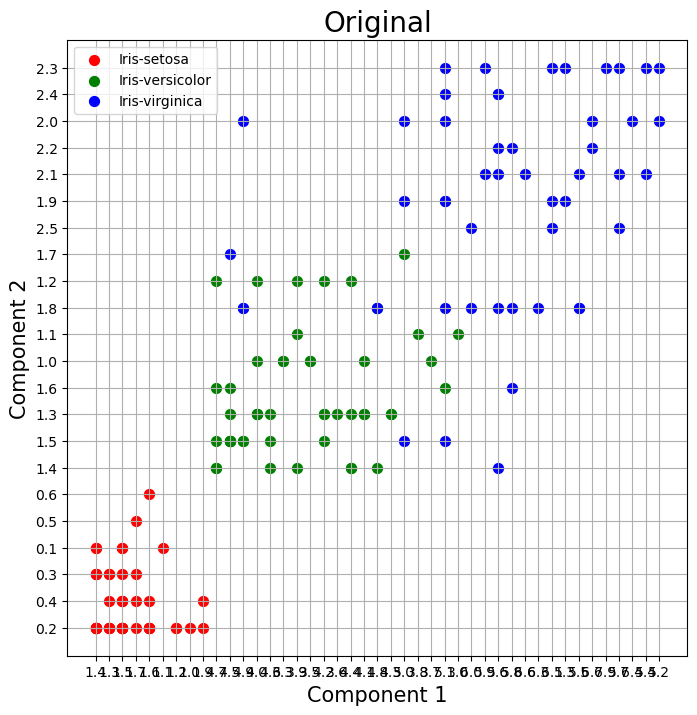

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Original', fontsize = 20)

colors = ['r', 'g', 'b']

x = iris.data[:, 2:]
dfPlot = pd.DataFrame(data=np.c_[x, y],
                 columns=iris['feature_names'][2:]+['target'])

for target, color in zip(targets,colors):  
    indicesToKeep = dfPlot['target'] == target
    ax.scatter(dfPlot.loc[indicesToKeep, 'petal length (cm)']
               , dfPlot.loc[indicesToKeep, 'petal width (cm)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

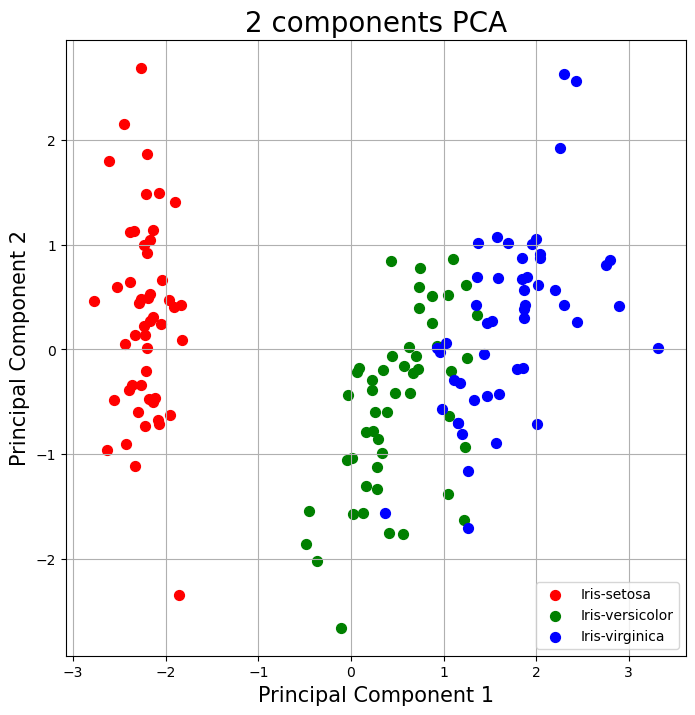

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()